Load file and remove background signal

In [7]:
import sys
from pathlib import Path
sys.path.append(str(Path.cwd().parent / "src"))
print(sys.path[-1])

/Users/hawkins/code/hBN_PL/src


In [8]:
print(sys.path[-1])

/Users/hawkins/code/hBN_PL/src


In [9]:
import hbn_pl.io as io
import hbn_pl.preprocess as preprocess
import hbn_pl.plot as plot
import hbn_pl.peaks as peaks


DATA_DIR = Path("/Users/magdalenaglinka/Documents/code/hBN_PL/Data/All data")
FILE_NAME = 'sample7_emitter24_grating150_exposure60_100uW 2026 January 12 17_47_41.spe'
#FILE_NAME = '2025-11-17 17_34_30 sample5_DCMd2_200uw_emitter11 2189.spe'
#FILE_NAME = '2025-11-17 17_59_53 sample5_DCMd2_200uw_emitter17 2195.spe'
spe_path = DATA_DIR / FILE_NAME
wavelength, frames = io.load_spe(spe_path)
frames = frames[0:15]
frames = preprocess.background_subtract(frames, bg_slice=(1, 50))
plot.plot_frames(wavelength, frames)

ModuleNotFoundError: No module named 'hbn_pl.peaks'

Cosmic ray removal

Detected 7 cosmic ray frames: [1, 4, 5, 6, 7, 8, 12]


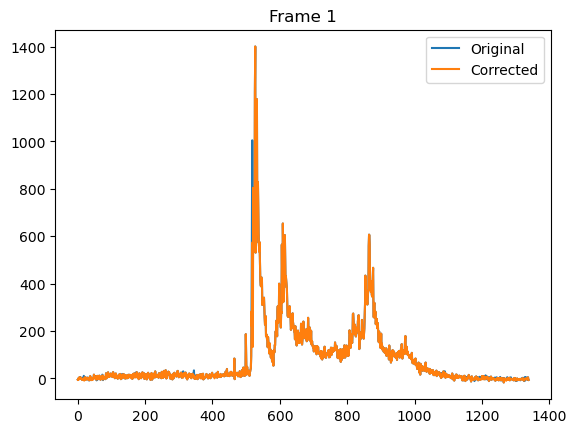

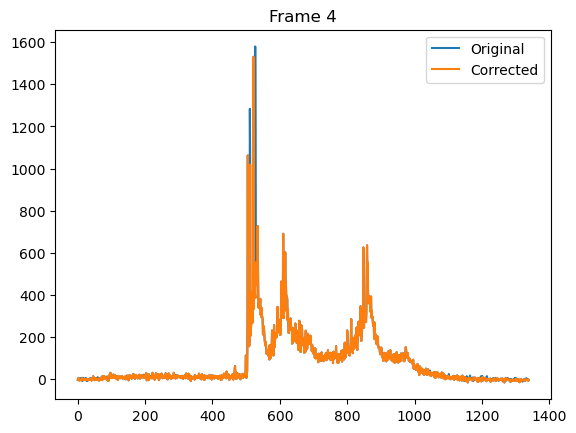

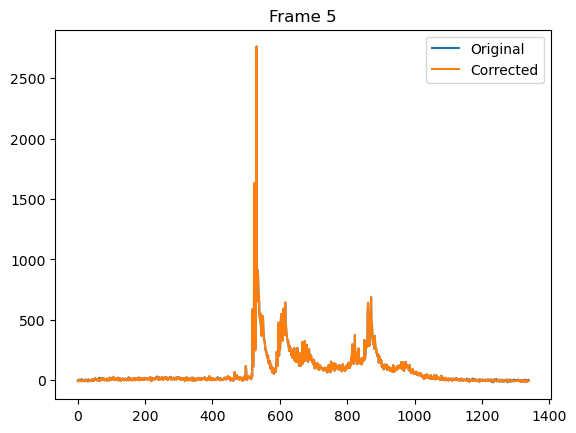

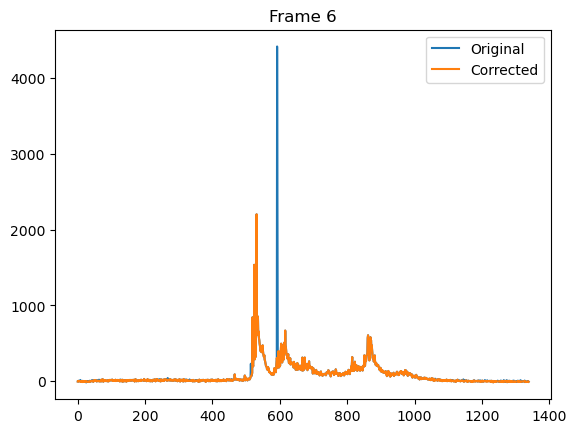

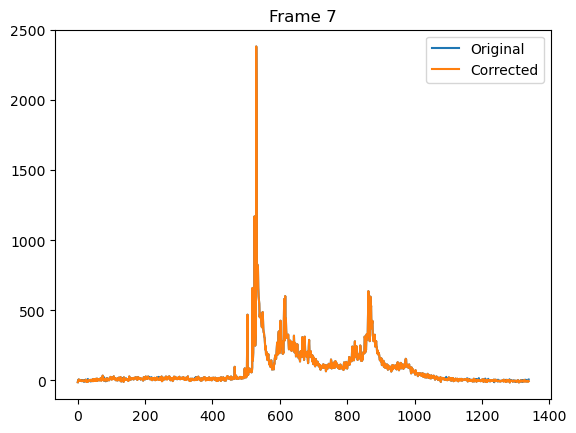

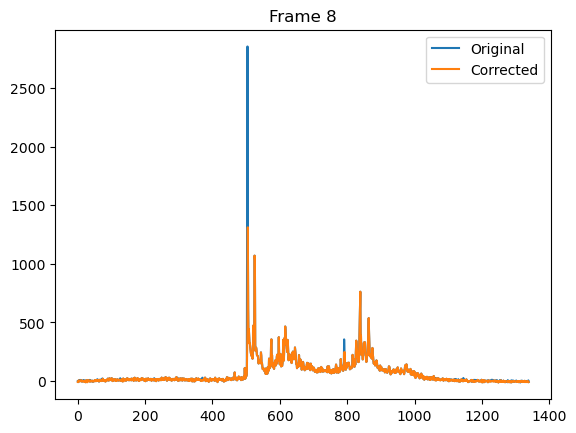

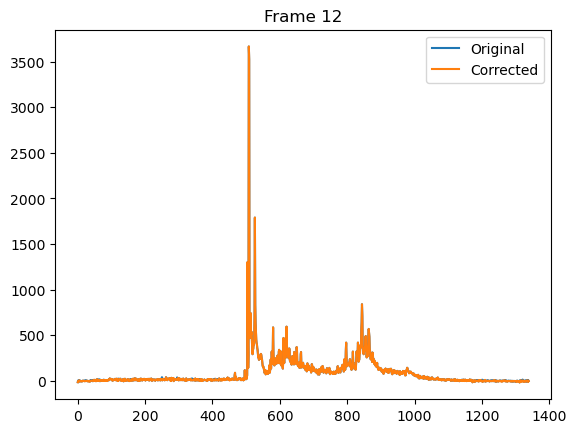

In [ ]:
frames_norm = preprocess.normalise(frames)
cosmic_frames = preprocess.detect_cosmic_frames(frames_norm, sigma_threshold=90, min_outliers=3)
frames = preprocess.remove_cosmic_rays(frames, cosmic_frames, sigma=2.5)

Bad frame removal

In [ ]:
drop_fraction = 0.6
bad_frames = preprocess.detect_bad_frames_simple(frames, drop_fraction = drop_fraction)
#bad_frames = preprocess.detect_bad_frames_complex(frames, window = 5, drop_fraction = drop_fraction)
#frames = preprocess.remove_frames(frames, bad_frames)

Detected bad frames due to intensity drop 0.6: []


Average and normalise

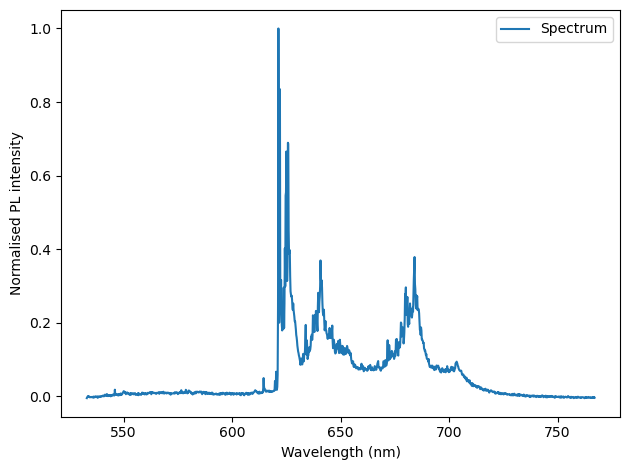

In [ ]:
avg, avg_norm = preprocess.average_and_normalise(frames)
plot.plot_spectrum(wavelength, avg_norm)

## Peak finding

In [ ]:
import hbn_pl.peaks2 as peaks2
import hbn_pl.classification2 as classification

Detected peaks:
{'location': np.float64(621.3186197164536), 'intensity': np.float64(1.0), 'fwhm': np.float64(0.34980225875631277), 'prominence': np.float64(1.0044712146509558)}
{'location': np.float64(622.018222963527), 'intensity': np.float64(0.8349362079136581), 'fwhm': np.float64(0.17490057295196948), 'prominence': np.float64(0.634495616947079)}
{'location': np.float64(623.7672198402339), 'intensity': np.float64(0.29590559511344555), 'fwhm': np.float64(0.17489895772700947), 'prominence': np.float64(0.1097885642263644)}
{'location': np.float64(624.2919157304096), 'intensity': np.float64(0.40273040142974376), 'fwhm': np.float64(0.1748984658495374), 'prominence': np.float64(0.10362486204321886)}
{'location': np.float64(624.9915079429708), 'intensity': np.float64(0.665712488272313), 'fwhm': np.float64(0.5246939114203997), 'prominence': np.float64(0.3518839399803649)}
{'location': np.float64(625.691097496198), 'intensity': np.float64(0.6894987407022029), 'fwhm': np.float64(0.524690909547

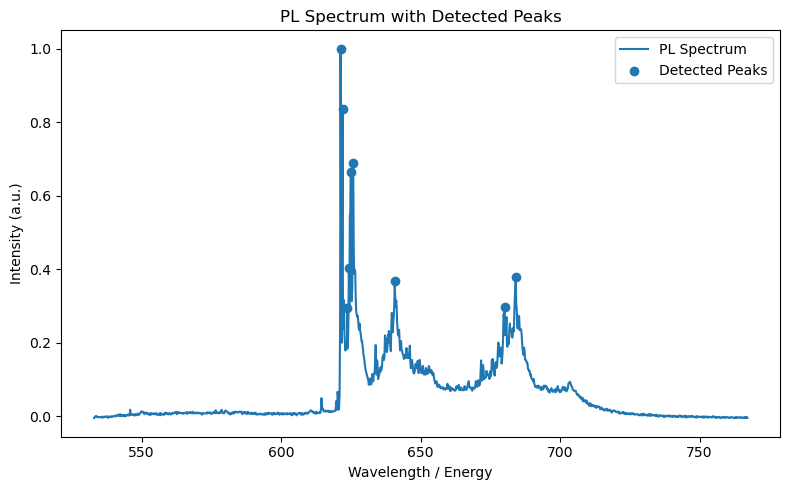

In [ ]:
finder = peaks2.PeakFinder(wavelength, avg_norm)

finder.peak_finding(prominence=0.1)

peaks = finder.extract_peak_parameters()

print("Detected peaks:")
for p in peaks:
    print(p)

finder.plot_peaks()


## Classification

In [ ]:
classifier = classification.ZPLClassification(peaks, thresholds={
            "max_fwhm": 0.9,           
            "min_prominence": 0.6,   
            "location_range": [615, 660]    
        })

result = classifier.classify()

print(result)



Two ZPLs
Peak 1: location = 621.3, prominence = 1.0
Peak 2: location = 622.0, prominence = 0.6
